# Example code for comparisons between MOONS1D and the MOONS ETC

In [1]:
import numpy as np
import moons1d
import matplotlib.pyplot as plt

from astropy.io import fits

from etc_interface import moons_etc

# Loading an example model galaxy spectrum

In [2]:
hdu = fits.open("spiral_disk_lowAv_BC03_0.0_vw.fits")[0]
wave = hdu.header['CRVAL1'] + hdu.header['CDELT1']*np.arange(hdu.header['NAXIS1'])
flux = hdu.data

spectrum = np.c_[wave, flux]

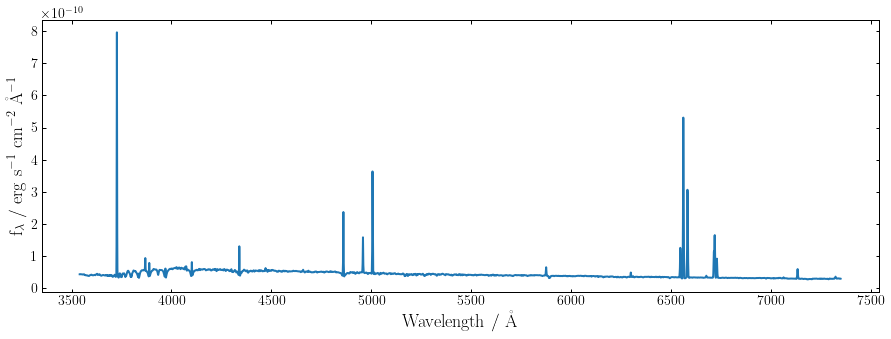

In [3]:
fig = plt.figure(figsize=(15, 5))
plt.plot(spectrum[:, 0], spectrum[:, 1])
plt.xlabel("$\mathrm{Wavelength\ /\ \AA}$")
plt.ylabel("$\mathrm{f_\lambda\ /\ erg\ s^{-1}\ cm^{-2}\ \AA^{-1}}$")

plt.show()

# Running the example spectrum through the MOONS ETC

In [4]:
# Generate an instance of the MOONS ETC

# etc_path must be edited to the location of the ETC on your machine
etc_path = "/Users/adam/work/moons/moons_etc_v4.3_osx/moons_etc"  
etc = moons_etc(etc_path)

# Save the input spectrum to file
np.savetxt("etc_input_spec.txt", spectrum)

# We can also use a flat input spectrum in f_lambda by using the following
# spectrum = np.c_[wave, np.ones(wave.shape[0])]

# Run the MOONS ETC on the saved spectrum
sensitivity = etc.run("etc_input_spec.txt", resolution="LR", channel="YJ", 
                      system="AB", redshift=1., mag=20, NDIT=4, DIT=900, 
                      atm_corr=1.2, extended=0, emlineW=0, emlineFWHM=0,
                      emlineF=0, seeing=0.8, airmass=1.2, stray=1.,
                      skyres=1., clean=True)

### The array sensitivity contains two columns with the following information:
 - Wavelength in Angstroms
 - SNR at each wavelength
 

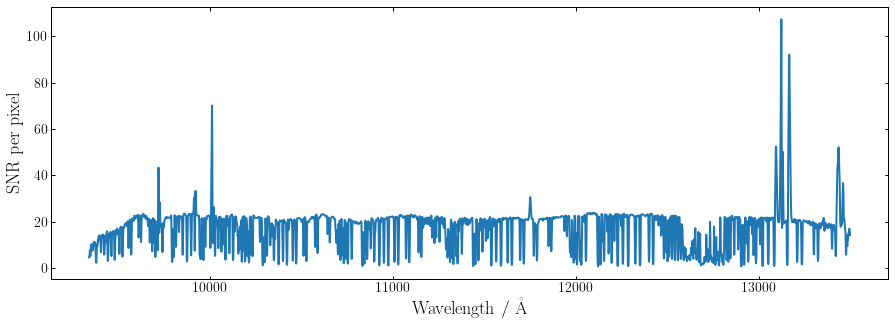

In [5]:
fig = plt.figure(figsize=(15, 5))
plt.plot(sensitivity[:, 0], sensitivity[:, 1])
plt.xlabel("$\mathrm{Wavelength\ /\ \AA}$")
plt.ylabel("$\mathrm{SNR\ per\ pixel}$")

plt.show()

# Running the same spectrum through MOONS1D

In [6]:
spec_m1d = moons1d.run("spiral_disk_lowAv_BC03_0.0_vw.fits", band="YJ", 
                       mode="LR", mag=20., mag_band_centre=12300.,
                       mag_band_width=50., dit=900, ndit=4, redshift=1.,
                       at_corr=1.2, seeing=0.8, airmass=1.2, temperature=11.5,
                       humidity=14.5, pressure=743., stray=1., skyres=1.,
                       telescope="VLT", obs_id="default", verbose=False)

### The array spec_m1d contains four columns:
 - Wavelength in Angstroms
 - The input model spectrum redshifted and re-normalised by moons1d (erg/s/cm^2/A)
 - Mock observed fluxes (erg/s/cm^2/A)
 - Error spectrum (erg/s/cm^2/A)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


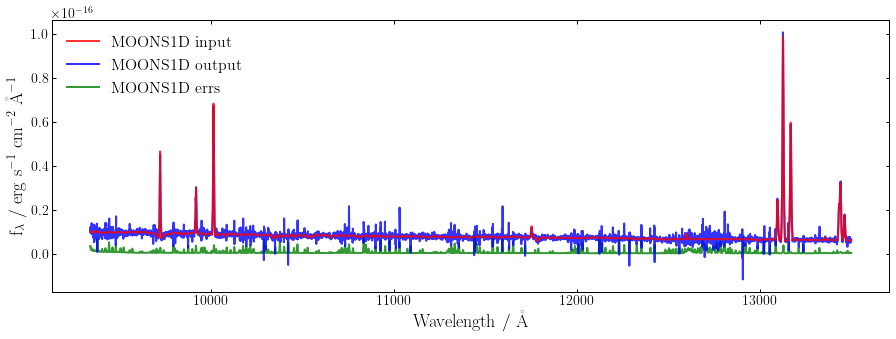

In [7]:
fig = plt.figure(figsize=(15, 5))
plt.plot(spec_m1d[:, 0], spec_m1d[:, 1], color="red", label="$\mathrm{MOONS1D\ input}$", alpha=0.8, zorder=10)
plt.plot(spec_m1d[:, 0], spec_m1d[:, 2], color="blue", label="$\mathrm{MOONS1D\ output}$", alpha=0.8, zorder=9)
plt.plot(spec_m1d[:, 0], spec_m1d[:, 3], color="green", label="$\mathrm{MOONS1D\ errs}$", alpha=0.8, zorder=8)

plt.xlabel("$\mathrm{Wavelength\ /\ \AA}$")
plt.ylabel("$\mathrm{f_\lambda\ /\ erg\ s^{-1}\ cm^{-2}\ \AA^{-1}}$")

plt.legend(frameon=False, fontsize=16)

plt.show()

## Aim is to get SNR curves from both onto the same axes

### Current challenges:
 - No way to see the input spectrum for the ETC. I can't see what it's doing with regard to normalisation and redshifting so I can't confirm exactly the same inputs are being provided to both.
 
 - How comparable are the input parameters I'm using for both simulators? E.g. question of "nod" mode and root(2) factor. MOONS1D seems to only be set up for the "nod" mode, ETC for "stare" mode.
 
 - The results returned by the two codes are on slightly different wavelenth grids, so I can currently only do sensible SNR comparisons by binning up a few pixels. Maybe this is fine? Myriam probably knows how to change the pixel size in moons1d?

 - The MOONS1D version this notebook runs isn't public yet, so nobody else can run/edit this notebook. Need to discuss this with Myriam on Thursday.